In [20]:
import autograd.numpy as ag_np
from matplotlib import pyplot as plt
import pandas as pd
from utils import load_dataset
import os
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from CollabFilterMeanOnly import CollabFilterMeanOnly
from CollabFilterOneScalarPerItem import CollabFilterOneScalarPerItem
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

In [21]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
m1 = CollabFilterMeanOnly(n_epochs=50)
m1.init_parameter_dict(n_users, n_items, train_tuple)

m1.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    13.82200 | train_MAE     3.53239 | valid_MAE     3.50620 | grad_wrt_mu     7.10400
epoch       0.013 | loss_total     9.11851 | train_MAE     2.82199 | valid_MAE     2.79580 | grad_wrt_mu     5.63320
epoch       0.025 | loss_total     6.60551 | train_MAE     2.29207 | valid_MAE     2.26637 | grad_wrt_mu     4.63456
epoch       0.100 | loss_total     1.68633 | train_MAE     1.05029 | valid_MAE     1.03490 | grad_wrt_mu     1.24038
epoch       0.200 | loss_total     1.26837 | train_MAE     0.95532 | valid_MAE     0.95363 | grad_wrt_mu     0.10245
epoch       0.313 | loss_total     1.28873 | train_MAE     0.94556 | valid_MAE     0.94652 | grad_wrt_mu     0.04033
epoch       0.400 | loss_total     1.32975 | train_MAE     0.94431 | valid_MAE     0.94560 | grad_wrt_mu     0.02424
epoch       0.500 | loss_total     1.21539 | train_MAE     0.94557 | valid_MAE     0.94652 | grad_wrt_mu     0.00853
epoch       0.613 | loss_total     1.27747 | train_MAE     0.944

epoch      12.000 | loss_total     1.26688 | train_MAE     0.94688 | valid_MAE     0.94748 | grad_wrt_mu     0.07211
epoch      13.000 | loss_total     1.26694 | train_MAE     0.94360 | valid_MAE     0.94509 | grad_wrt_mu     0.06104
epoch      14.000 | loss_total     1.26653 | train_MAE     0.94446 | valid_MAE     0.94572 | grad_wrt_mu     0.01450
epoch      15.000 | loss_total     1.26715 | train_MAE     0.94423 | valid_MAE     0.94555 | grad_wrt_mu     0.03559
epoch      16.000 | loss_total     1.26600 | train_MAE     0.94184 | valid_MAE     0.94380 | grad_wrt_mu     0.03685
epoch      17.000 | loss_total     1.26828 | train_MAE     0.94422 | valid_MAE     0.94554 | grad_wrt_mu     0.06190
epoch      18.000 | loss_total     1.26533 | train_MAE     0.94433 | valid_MAE     0.94562 | grad_wrt_mu     0.03619
epoch      19.000 | loss_total     1.26817 | train_MAE     0.94420 | valid_MAE     0.94552 | grad_wrt_mu     0.10230
epoch      20.000 | loss_total     1.26601 | train_MAE     0.942

A

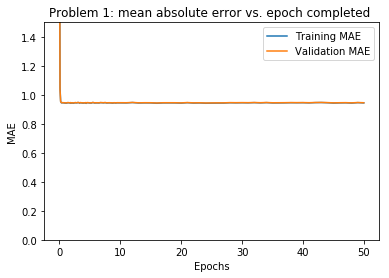

In [172]:
plt.plot(m1.trace_epoch, m1.trace_mae_train, label="Training MAE")
plt.plot(m1.trace_epoch, m1.trace_mae_valid, label="Validation MAE")
plt.ylim((0, 1.5))
plt.xlabel("Epochs")
plt.title("Problem 1: mean absolute error vs. epoch completed ")
plt.ylabel("MAE")
plt.legend()

The MAE in both training and validation are identical, so it overlaps with each other (the training MAE can't be seen because the validation MAE is identical)

B

In the case of this specific dataset, the training and validation set are identical, so regularization would not really improve it, but at the same time it is good to have one. What is special about this task that makes a regularization term not as necessary is that it mainly looks at the mean value, and doesn't try to overfit based on the values given. 

C

In [4]:
print(ag_np.mean(train_tuple[2]))
print(m1.param_dict["mu"])

3.5323907390739073
[3.53671133]


The operation is to calculate the mean of all of the ratings with numpy's mean function. The calculated mean is 3.53239. This is fairly close to my SGD solution, which was 3.5367.

2

In [173]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
m2 = CollabFilterOneScalarPerItem(
        n_epochs=100, step_size=0.25)
m2.init_parameter_dict(n_users, n_items, train_tuple)
m2.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.20568 | train_MAE     0.94428 | valid_MAE     0.94558 | grad_wrt_mu     0.03922 | grad_wrt_b_per_user     0.00136 | grad_wrt_c_per_item     0.00085
epoch       0.013 | loss_total     1.18469 | train_MAE     0.94287 | valid_MAE     0.94448 | grad_wrt_mu     0.03048 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00082
epoch       0.025 | loss_total     1.23732 | train_MAE     0.94337 | valid_MAE     0.94476 | grad_wrt_mu     0.11221 | grad_wrt_b_per_user     0.00142 | grad_wrt_c_per_item     0.00084
epoch       0.100 | loss_total     1.29605 | train_MAE     0.94329 | valid_MAE     0.94430 | grad_wrt_mu     0.05696 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00088
epoch       0.200 | loss_total     1.25642 | train_MAE     0.93765 | valid_MAE     0.93957 | grad_wrt_mu     0.12382 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00087
epoch       0.313 | loss_total     1.26816 | train_MAE     0.93614 | valid_

epoch       5.000 | loss_total     1.07899 | train_MAE     0.85114 | valid_MAE     0.85753 | grad_wrt_mu     0.02870 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00073
epoch       5.250 | loss_total     1.07871 | train_MAE     0.84843 | valid_MAE     0.85493 | grad_wrt_mu     0.02289 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00074
epoch       5.500 | loss_total     1.07093 | train_MAE     0.85281 | valid_MAE     0.85732 | grad_wrt_mu     0.05761 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00080
epoch       5.750 | loss_total     1.06069 | train_MAE     0.84403 | valid_MAE     0.85040 | grad_wrt_mu     0.02471 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00070
epoch       6.000 | loss_total     1.05836 | train_MAE     0.84018 | valid_MAE     0.84700 | grad_wrt_mu     0.04110 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00072
epoch       6.250 | loss_total     1.05065 | train_MAE     0.83728 | valid_

epoch      35.000 | loss_total     0.89342 | train_MAE     0.75298 | valid_MAE     0.76545 | grad_wrt_mu     0.10601 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00061
epoch      36.000 | loss_total     0.89372 | train_MAE     0.75225 | valid_MAE     0.76477 | grad_wrt_mu     0.01509 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00066
epoch      37.000 | loss_total     0.88971 | train_MAE     0.74971 | valid_MAE     0.76296 | grad_wrt_mu     0.09336 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00061
epoch      38.000 | loss_total     0.88992 | train_MAE     0.74974 | valid_MAE     0.76276 | grad_wrt_mu     0.11598 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00063
epoch      39.000 | loss_total     0.88875 | train_MAE     0.74901 | valid_MAE     0.76210 | grad_wrt_mu     0.06240 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00065
epoch      40.000 | loss_total     0.88515 | train_MAE     0.74901 | valid_

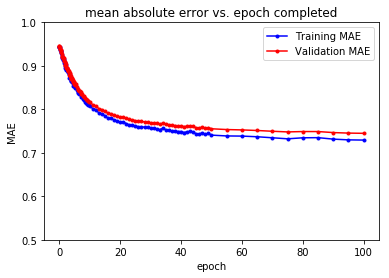

In [9]:
plt.plot(m2.trace_epoch, m2.trace_mae_train, 'b.-', label="Training MAE")
plt.plot(m2.trace_epoch, m2.trace_mae_valid, 'r.-', label="Validation MAE")
plt.ylim((0.5, 1))
plt.title("mean absolute error vs. epoch completed")
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend()

The y axis is error, and the x axis is number of epochs. In this plot, there is a slight amount of overfitting.

2B

In [174]:
m2Err = m2.trace_mae_valid[-1]
print(m2Err)
m1Err = m1.trace_mae_valid[-1]
print(m1Err)

0.744843941220189
0.9455103013286531


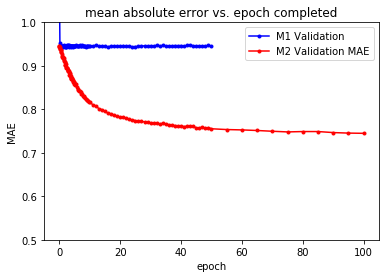

In [175]:
plt.plot(m1.trace_epoch, m1.trace_mae_valid, 'b.-', label="M1 Validation")
plt.plot(m2.trace_epoch, m2.trace_mae_valid, 'r.-', label="M2 Validation MAE")
plt.ylim((0.5, 1))
plt.title("mean absolute error vs. epoch completed")
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend()

The validation error is lower for m2 because it assigned a value to each specific movie, so factors from other movies do not affect its personalized mean. 

2c

In [11]:
m2.param_dict["c_per_item"]

array([ 0.52589581, -0.0202405 , -0.29955811, ..., -0.05492928,
        0.00619076,  0.        ])

In [22]:
select_df = pd.read_csv(os.path.join('.', 'data_movie_lens_100k/', "select_movies.csv"))
select_ids = select_df["item_id"].tolist()

In [13]:

print(m2.param_dict["c_per_item"][select_ids])
print(select_ids)

print(select_df.loc[select_df['item_id'] == 49])
print(select_df.loc[select_df['item_id'] == 893])
select_ids

[ 0.52589581  0.38489442  0.34441974  0.69395847  0.32277058  1.00040654
  0.84610283  0.66028577  0.31919896 -0.48805245  0.97411946  0.58311868
  0.16393903  0.13713762 -0.01728031  0.20458545  0.40161243 -0.09122694
  0.07293158 -0.2620002 ]
[0, 70, 98, 131, 142, 49, 171, 180, 81, 251, 173, 209, 65, 87, 254, 90, 199, 218, 286, 893]
   item_id             title  release_year  orig_item_id
5       49  Star Wars (1977)          1977            50
    item_id            title  release_year  orig_item_id
19      893  Scream 2 (1997)          1997           895


[0,
 70,
 98,
 131,
 142,
 49,
 171,
 180,
 81,
 251,
 173,
 209,
 65,
 87,
 254,
 90,
 199,
 218,
 286,
 893]

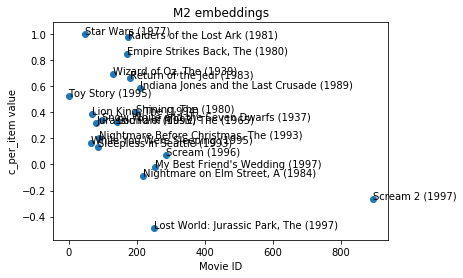

In [176]:
names = select_df["title"].tolist()
ids = select_df["item_id"].tolist()
plt.scatter(ids, m2.param_dict["c_per_item"][ids])
plt.ylabel("c_per_item value")
plt.title("M2 embeddings")
plt.xlabel("Movie ID")
for i, txt in enumerate(names):
    plt.annotate(txt, (ids[i], m2.param_dict["c_per_item"][ids][i]))

The trend seems to be, the higher the c value, the higher the movie rating. A movie with a large positive value (Star Wars) is regarded to be a very good movie. The movie with the lowest C value is Jurrasic Park, the Lost World, which based on IMDB reviews, is not a good movie. Therefore, a higher c value means a better movie.

#3

In [97]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_dataset()
m32 = CollabFilterOneVectorPerItem(
        n_epochs=1000, step_size=0.25, n_factors =2, alpha = 0.0)
m32.init_parameter_dict(n_users, n_items, train_tuple)
m32.fit(train_tuple, valid_tuple)


epoch       0.000 | loss_total     7.73020 | train_MAE     2.24348 | valid_MAE     2.26721 | grad_wrt_mu     4.14408 | grad_wrt_b_per_user     0.00459 | grad_wrt_c_per_item     0.00256 | grad_wrt_U     0.00335 | grad_wrt_V     0.00187
epoch       0.013 | loss_total     4.58579 | train_MAE     1.60876 | valid_MAE     1.62595 | grad_wrt_mu     1.93902 | grad_wrt_b_per_user     0.00273 | grad_wrt_c_per_item     0.00155 | grad_wrt_U     0.00274 | grad_wrt_V     0.00154
epoch       0.025 | loss_total     3.75418 | train_MAE     1.45481 | valid_MAE     1.46472 | grad_wrt_mu     0.92994 | grad_wrt_b_per_user     0.00236 | grad_wrt_c_per_item     0.00131 | grad_wrt_U     0.00251 | grad_wrt_V     0.00137
epoch       0.100 | loss_total     3.45210 | train_MAE     1.41118 | valid_MAE     1.41404 | grad_wrt_mu     0.12844 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00123 | grad_wrt_U     0.00250 | grad_wrt_V     0.00135
epoch       0.200 | loss_total     3.22409 | train_MAE     1

epoch       3.900 | loss_total     2.07813 | train_MAE     1.09870 | valid_MAE     1.11658 | grad_wrt_mu     0.01149 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00147 | grad_wrt_V     0.00075
epoch       4.000 | loss_total     2.05633 | train_MAE     1.09439 | valid_MAE     1.11225 | grad_wrt_mu     0.02898 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00098 | grad_wrt_U     0.00146 | grad_wrt_V     0.00081
epoch       4.100 | loss_total     2.03377 | train_MAE     1.08906 | valid_MAE     1.10730 | grad_wrt_mu     0.00162 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00141 | grad_wrt_V     0.00074
epoch       4.200 | loss_total     2.01405 | train_MAE     1.08850 | valid_MAE     1.10557 | grad_wrt_mu     0.17974 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00103 | grad_wrt_U     0.00146 | grad_wrt_V     0.00078
epoch       4.313 | loss_total     1.99156 | train_MAE     1

epoch      14.000 | loss_total     1.24148 | train_MAE     0.87337 | valid_MAE     0.90250 | grad_wrt_mu     0.07014 | grad_wrt_b_per_user     0.00126 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00082 | grad_wrt_V     0.00038
epoch      15.000 | loss_total     1.21393 | train_MAE     0.86429 | valid_MAE     0.89382 | grad_wrt_mu     0.08800 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00079 | grad_wrt_V     0.00037
epoch      16.000 | loss_total     1.18759 | train_MAE     0.85550 | valid_MAE     0.88559 | grad_wrt_mu     0.03617 | grad_wrt_b_per_user     0.00135 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00078 | grad_wrt_V     0.00038
epoch      17.000 | loss_total     1.16463 | train_MAE     0.84740 | valid_MAE     0.87805 | grad_wrt_mu     0.05724 | grad_wrt_b_per_user     0.00129 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00078 | grad_wrt_V     0.00036
epoch      18.000 | loss_total     1.14400 | train_MAE     0

epoch      49.000 | loss_total     0.91841 | train_MAE     0.75830 | valid_MAE     0.79389 | grad_wrt_mu     0.02641 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00049 | grad_wrt_V     0.00022
epoch      50.000 | loss_total     0.91658 | train_MAE     0.75734 | valid_MAE     0.79297 | grad_wrt_mu     0.00912 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00052 | grad_wrt_V     0.00022
epoch      55.000 | loss_total     0.90521 | train_MAE     0.75127 | valid_MAE     0.78787 | grad_wrt_mu     0.13595 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00047 | grad_wrt_V     0.00019
epoch      60.000 | loss_total     0.89505 | train_MAE     0.74599 | valid_MAE     0.78366 | grad_wrt_mu     0.14094 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00044 | grad_wrt_V     0.00019
epoch      65.000 | loss_total     0.88694 | train_MAE     0

epoch     220.000 | loss_total     0.81398 | train_MAE     0.71401 | valid_MAE     0.75788 | grad_wrt_mu     0.04188 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00038 | grad_wrt_V     0.00014
epoch     225.000 | loss_total     0.81429 | train_MAE     0.71145 | valid_MAE     0.75629 | grad_wrt_mu     0.02911 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00016
epoch     230.000 | loss_total     0.81311 | train_MAE     0.71124 | valid_MAE     0.75626 | grad_wrt_mu     0.05591 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00036 | grad_wrt_V     0.00015
epoch     235.000 | loss_total     0.81297 | train_MAE     0.71105 | valid_MAE     0.75624 | grad_wrt_mu     0.04019 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00040 | grad_wrt_V     0.00014
epoch     240.000 | loss_total     0.81196 | train_MAE     0

epoch     395.000 | loss_total     0.79069 | train_MAE     0.70165 | valid_MAE     0.75386 | grad_wrt_mu     0.09898 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00038 | grad_wrt_V     0.00014
epoch     400.000 | loss_total     0.79135 | train_MAE     0.70016 | valid_MAE     0.75304 | grad_wrt_mu     0.01193 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00045 | grad_wrt_V     0.00017
epoch     405.000 | loss_total     0.78899 | train_MAE     0.70017 | valid_MAE     0.75312 | grad_wrt_mu     0.04783 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00043 | grad_wrt_V     0.00017
epoch     410.000 | loss_total     0.78825 | train_MAE     0.69940 | valid_MAE     0.75278 | grad_wrt_mu     0.08501 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00039 | grad_wrt_V     0.00016
epoch     415.000 | loss_total     0.78916 | train_MAE     0

epoch     570.000 | loss_total     0.77040 | train_MAE     0.69066 | valid_MAE     0.74893 | grad_wrt_mu     0.01313 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00042 | grad_wrt_V     0.00019
epoch     575.000 | loss_total     0.76957 | train_MAE     0.69012 | valid_MAE     0.74864 | grad_wrt_mu     0.06795 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00044 | grad_wrt_V     0.00019
epoch     580.000 | loss_total     0.76804 | train_MAE     0.69047 | valid_MAE     0.74875 | grad_wrt_mu     0.06888 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch     585.000 | loss_total     0.76747 | train_MAE     0.69057 | valid_MAE     0.74875 | grad_wrt_mu     0.07884 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00047 | grad_wrt_V     0.00018
epoch     590.000 | loss_total     0.76761 | train_MAE     0

epoch     745.000 | loss_total     0.75291 | train_MAE     0.68288 | valid_MAE     0.74382 | grad_wrt_mu     0.02636 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00044 | grad_wrt_V     0.00019
epoch     750.000 | loss_total     0.75286 | train_MAE     0.68288 | valid_MAE     0.74380 | grad_wrt_mu     0.04416 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00050 | grad_wrt_V     0.00019
epoch     755.000 | loss_total     0.75225 | train_MAE     0.68153 | valid_MAE     0.74332 | grad_wrt_mu     0.02518 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00050 | grad_wrt_V     0.00019
epoch     760.000 | loss_total     0.75191 | train_MAE     0.68180 | valid_MAE     0.74330 | grad_wrt_mu     0.08203 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00048 | grad_wrt_V     0.00018
epoch     765.000 | loss_total     0.75096 | train_MAE     0

epoch     920.000 | loss_total     0.73987 | train_MAE     0.67666 | valid_MAE     0.74044 | grad_wrt_mu     0.07380 | grad_wrt_b_per_user     0.00090 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00047 | grad_wrt_V     0.00019
epoch     925.000 | loss_total     0.73937 | train_MAE     0.67682 | valid_MAE     0.74047 | grad_wrt_mu     0.16561 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00047 | grad_wrt_V     0.00019
epoch     930.000 | loss_total     0.74008 | train_MAE     0.67701 | valid_MAE     0.74052 | grad_wrt_mu     0.00306 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00051 | grad_wrt_V     0.00019
epoch     935.000 | loss_total     0.73835 | train_MAE     0.67575 | valid_MAE     0.74009 | grad_wrt_mu     0.02885 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00046 | grad_wrt_V     0.00018
epoch     940.000 | loss_total     0.73809 | train_MAE     0

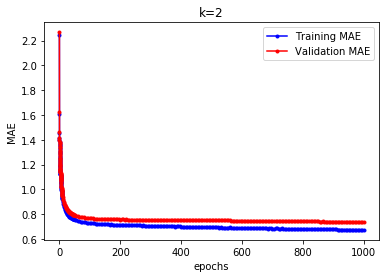

In [98]:
plt.plot(m32.trace_epoch, m32.trace_mae_train, label="Training MAE")
plt.plot(m32.trace_epoch, m32.trace_mae_valid, label="Validation MAE")
plt.title("k=2")
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.legend()

In [99]:
m310 = CollabFilterOneVectorPerItem(
        n_epochs=1000, step_size=0.5, n_factors =10, alpha = 0.0)
m310.init_parameter_dict(n_users, n_items, train_tuple)
m310.fit(train_tuple, valid_tuple)


epoch       0.000 | loss_total     7.73020 | train_MAE     2.24348 | valid_MAE     2.26721 | grad_wrt_mu     4.14408 | grad_wrt_b_per_user     0.00459 | grad_wrt_c_per_item     0.00256 | grad_wrt_U     0.00335 | grad_wrt_V     0.00187
epoch       0.013 | loss_total     3.64190 | train_MAE     1.42135 | valid_MAE     1.42374 | grad_wrt_mu     0.14104 | grad_wrt_b_per_user     0.00221 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00254 | grad_wrt_V     0.00142
epoch       0.025 | loss_total     3.51994 | train_MAE     1.41379 | valid_MAE     1.41748 | grad_wrt_mu     0.03477 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00245 | grad_wrt_V     0.00132
epoch       0.100 | loss_total     3.38650 | train_MAE     1.40088 | valid_MAE     1.40353 | grad_wrt_mu     0.20150 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00123 | grad_wrt_U     0.00245 | grad_wrt_V     0.00133
epoch       0.200 | loss_total     3.10776 | train_MAE     1

epoch       3.800 | loss_total     1.63010 | train_MAE     0.97813 | valid_MAE     0.99956 | grad_wrt_mu     0.25813 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00124 | grad_wrt_V     0.00063
epoch       3.900 | loss_total     1.60823 | train_MAE     0.96666 | valid_MAE     0.99027 | grad_wrt_mu     0.06040 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00112 | grad_wrt_V     0.00054
epoch       4.000 | loss_total     1.58918 | train_MAE     0.96243 | valid_MAE     0.98613 | grad_wrt_mu     0.01311 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00109 | grad_wrt_V     0.00059
epoch       4.100 | loss_total     1.57129 | train_MAE     0.95806 | valid_MAE     0.98188 | grad_wrt_mu     0.01136 | grad_wrt_b_per_user     0.00143 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00107 | grad_wrt_V     0.00054
epoch       4.200 | loss_total     1.55454 | train_MAE     0

epoch      13.000 | loss_total     1.04161 | train_MAE     0.80504 | valid_MAE     0.83734 | grad_wrt_mu     0.08233 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00060 | grad_wrt_V     0.00027
epoch      14.000 | loss_total     1.02289 | train_MAE     0.79445 | valid_MAE     0.82842 | grad_wrt_mu     0.03394 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00062 | grad_wrt_V     0.00026
epoch      15.000 | loss_total     1.00829 | train_MAE     0.79031 | valid_MAE     0.82400 | grad_wrt_mu     0.05347 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00058 | grad_wrt_V     0.00025
epoch      16.000 | loss_total     0.99422 | train_MAE     0.78454 | valid_MAE     0.81880 | grad_wrt_mu     0.04231 | grad_wrt_b_per_user     0.00123 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00060 | grad_wrt_V     0.00026
epoch      17.000 | loss_total     0.98167 | train_MAE     0

epoch      49.000 | loss_total     0.85512 | train_MAE     0.73263 | valid_MAE     0.77017 | grad_wrt_mu     0.07875 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      50.000 | loss_total     0.85481 | train_MAE     0.73413 | valid_MAE     0.77107 | grad_wrt_mu     0.08828 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch      55.000 | loss_total     0.84886 | train_MAE     0.72608 | valid_MAE     0.76551 | grad_wrt_mu     0.14196 | grad_wrt_b_per_user     0.00105 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00040 | grad_wrt_V     0.00015
epoch      60.000 | loss_total     0.84363 | train_MAE     0.72260 | valid_MAE     0.76324 | grad_wrt_mu     0.17510 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00038 | grad_wrt_V     0.00016
epoch      65.000 | loss_total     0.83982 | train_MAE     0

epoch     220.000 | loss_total     0.78584 | train_MAE     0.70038 | valid_MAE     0.75386 | grad_wrt_mu     0.02526 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     225.000 | loss_total     0.78564 | train_MAE     0.69795 | valid_MAE     0.75243 | grad_wrt_mu     0.00282 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00046 | grad_wrt_V     0.00017
epoch     230.000 | loss_total     0.78387 | train_MAE     0.69627 | valid_MAE     0.75167 | grad_wrt_mu     0.06640 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     235.000 | loss_total     0.78304 | train_MAE     0.69652 | valid_MAE     0.75183 | grad_wrt_mu     0.04976 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00016
epoch     240.000 | loss_total     0.78209 | train_MAE     0

epoch     395.000 | loss_total     0.75021 | train_MAE     0.68429 | valid_MAE     0.74446 | grad_wrt_mu     0.16844 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00044 | grad_wrt_V     0.00017
epoch     400.000 | loss_total     0.75037 | train_MAE     0.67954 | valid_MAE     0.74233 | grad_wrt_mu     0.02685 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00052 | grad_wrt_V     0.00019
epoch     405.000 | loss_total     0.74818 | train_MAE     0.68141 | valid_MAE     0.74284 | grad_wrt_mu     0.00146 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00051 | grad_wrt_V     0.00019
epoch     410.000 | loss_total     0.74661 | train_MAE     0.68004 | valid_MAE     0.74218 | grad_wrt_mu     0.05048 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00044 | grad_wrt_V     0.00018
epoch     415.000 | loss_total     0.74845 | train_MAE     0

epoch     570.000 | loss_total     0.73021 | train_MAE     0.66991 | valid_MAE     0.73767 | grad_wrt_mu     0.08536 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00048 | grad_wrt_V     0.00020
epoch     575.000 | loss_total     0.72919 | train_MAE     0.66996 | valid_MAE     0.73731 | grad_wrt_mu     0.08401 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00048 | grad_wrt_V     0.00021
epoch     580.000 | loss_total     0.72811 | train_MAE     0.67193 | valid_MAE     0.73771 | grad_wrt_mu     0.02606 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00051 | grad_wrt_V     0.00020
epoch     585.000 | loss_total     0.72791 | train_MAE     0.67155 | valid_MAE     0.73750 | grad_wrt_mu     0.04509 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00060 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch     590.000 | loss_total     0.72782 | train_MAE     0

epoch     745.000 | loss_total     0.71794 | train_MAE     0.66519 | valid_MAE     0.73450 | grad_wrt_mu     0.04228 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00048 | grad_wrt_V     0.00020
epoch     750.000 | loss_total     0.71815 | train_MAE     0.66584 | valid_MAE     0.73474 | grad_wrt_mu     0.05719 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00051 | grad_wrt_V     0.00021
epoch     755.000 | loss_total     0.71754 | train_MAE     0.66415 | valid_MAE     0.73454 | grad_wrt_mu     0.01887 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00052 | grad_wrt_V     0.00021
epoch     760.000 | loss_total     0.71753 | train_MAE     0.66563 | valid_MAE     0.73462 | grad_wrt_mu     0.12917 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00050 | grad_wrt_V     0.00019
epoch     765.000 | loss_total     0.71669 | train_MAE     0

epoch     920.000 | loss_total     0.71066 | train_MAE     0.66132 | valid_MAE     0.73288 | grad_wrt_mu     0.10293 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch     925.000 | loss_total     0.71032 | train_MAE     0.66266 | valid_MAE     0.73336 | grad_wrt_mu     0.17369 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00049 | grad_wrt_V     0.00021
epoch     930.000 | loss_total     0.71145 | train_MAE     0.66272 | valid_MAE     0.73339 | grad_wrt_mu     0.01787 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00051 | grad_wrt_V     0.00021
epoch     935.000 | loss_total     0.70974 | train_MAE     0.66074 | valid_MAE     0.73277 | grad_wrt_mu     0.07240 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00048 | grad_wrt_V     0.00019
epoch     940.000 | loss_total     0.70980 | train_MAE     0

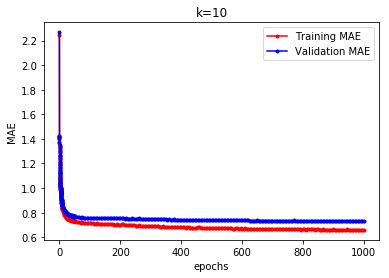

In [100]:
plt.plot(m310.trace_epoch, m310.trace_mae_train, label="Training MAE")
plt.title("k=10")
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.plot(m310.trace_epoch, m310.trace_mae_valid, label="Validation MAE")
plt.legend()

In [101]:
m350 = CollabFilterOneVectorPerItem(
        n_epochs=1000, step_size=0.5, n_factors =50, alpha = 0.0)
m350.init_parameter_dict(n_users, n_items, train_tuple)
m350.fit(train_tuple, valid_tuple)


epoch       0.000 | loss_total     7.73020 | train_MAE     2.24348 | valid_MAE     2.26721 | grad_wrt_mu     4.14408 | grad_wrt_b_per_user     0.00459 | grad_wrt_c_per_item     0.00256 | grad_wrt_U     0.00335 | grad_wrt_V     0.00187
epoch       0.013 | loss_total     3.64190 | train_MAE     1.42135 | valid_MAE     1.42374 | grad_wrt_mu     0.14104 | grad_wrt_b_per_user     0.00221 | grad_wrt_c_per_item     0.00128 | grad_wrt_U     0.00254 | grad_wrt_V     0.00142
epoch       0.025 | loss_total     3.51994 | train_MAE     1.41379 | valid_MAE     1.41748 | grad_wrt_mu     0.03477 | grad_wrt_b_per_user     0.00220 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00245 | grad_wrt_V     0.00132
epoch       0.100 | loss_total     3.38650 | train_MAE     1.40088 | valid_MAE     1.40353 | grad_wrt_mu     0.20150 | grad_wrt_b_per_user     0.00219 | grad_wrt_c_per_item     0.00123 | grad_wrt_U     0.00245 | grad_wrt_V     0.00133
epoch       0.200 | loss_total     3.10776 | train_MAE     1

epoch       3.613 | loss_total     1.66940 | train_MAE     0.98118 | valid_MAE     1.00380 | grad_wrt_mu     0.11381 | grad_wrt_b_per_user     0.00145 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00121 | grad_wrt_V     0.00061
epoch       3.713 | loss_total     1.64544 | train_MAE     0.97690 | valid_MAE     0.99950 | grad_wrt_mu     0.00824 | grad_wrt_b_per_user     0.00138 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00108 | grad_wrt_V     0.00056
epoch       3.800 | loss_total     1.63010 | train_MAE     0.97813 | valid_MAE     0.99956 | grad_wrt_mu     0.25813 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00124 | grad_wrt_V     0.00063
epoch       3.900 | loss_total     1.60823 | train_MAE     0.96666 | valid_MAE     0.99027 | grad_wrt_mu     0.06040 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00084 | grad_wrt_U     0.00112 | grad_wrt_V     0.00054
epoch       4.000 | loss_total     1.58918 | train_MAE     0

epoch      11.000 | loss_total     1.08972 | train_MAE     0.81782 | valid_MAE     0.85024 | grad_wrt_mu     0.05601 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00060 | grad_wrt_V     0.00030
epoch      12.000 | loss_total     1.06361 | train_MAE     0.81096 | valid_MAE     0.84328 | grad_wrt_mu     0.04862 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00069 | grad_wrt_U     0.00066 | grad_wrt_V     0.00030
epoch      13.000 | loss_total     1.04161 | train_MAE     0.80504 | valid_MAE     0.83734 | grad_wrt_mu     0.08233 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00060 | grad_wrt_V     0.00027
epoch      14.000 | loss_total     1.02289 | train_MAE     0.79445 | valid_MAE     0.82842 | grad_wrt_mu     0.03394 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00062 | grad_wrt_V     0.00026
epoch      15.000 | loss_total     1.00829 | train_MAE     0

epoch      46.000 | loss_total     0.85933 | train_MAE     0.73179 | valid_MAE     0.77008 | grad_wrt_mu     0.03283 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00043 | grad_wrt_V     0.00016
epoch      47.000 | loss_total     0.85694 | train_MAE     0.72998 | valid_MAE     0.76896 | grad_wrt_mu     0.03357 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00041 | grad_wrt_V     0.00015
epoch      48.000 | loss_total     0.85741 | train_MAE     0.73089 | valid_MAE     0.76921 | grad_wrt_mu     0.01903 | grad_wrt_b_per_user     0.00103 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00042 | grad_wrt_V     0.00016
epoch      49.000 | loss_total     0.85512 | train_MAE     0.73263 | valid_MAE     0.77017 | grad_wrt_mu     0.07875 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00064 | grad_wrt_U     0.00041 | grad_wrt_V     0.00017
epoch      50.000 | loss_total     0.85481 | train_MAE     0

epoch     205.000 | loss_total     0.79054 | train_MAE     0.70441 | valid_MAE     0.75605 | grad_wrt_mu     0.06439 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     210.000 | loss_total     0.78923 | train_MAE     0.70655 | valid_MAE     0.75781 | grad_wrt_mu     0.08161 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00044 | grad_wrt_V     0.00016
epoch     215.000 | loss_total     0.78863 | train_MAE     0.69763 | valid_MAE     0.75219 | grad_wrt_mu     0.08436 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00042 | grad_wrt_V     0.00017
epoch     220.000 | loss_total     0.78584 | train_MAE     0.70038 | valid_MAE     0.75386 | grad_wrt_mu     0.02526 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00041 | grad_wrt_V     0.00016
epoch     225.000 | loss_total     0.78564 | train_MAE     0

epoch     380.000 | loss_total     0.75279 | train_MAE     0.68146 | valid_MAE     0.74315 | grad_wrt_mu     0.12592 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00047 | grad_wrt_V     0.00018
epoch     385.000 | loss_total     0.75156 | train_MAE     0.68283 | valid_MAE     0.74363 | grad_wrt_mu     0.03133 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00047 | grad_wrt_V     0.00019
epoch     390.000 | loss_total     0.75098 | train_MAE     0.68295 | valid_MAE     0.74371 | grad_wrt_mu     0.10490 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch     395.000 | loss_total     0.75021 | train_MAE     0.68429 | valid_MAE     0.74446 | grad_wrt_mu     0.16844 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00044 | grad_wrt_V     0.00017
epoch     400.000 | loss_total     0.75037 | train_MAE     0

epoch     555.000 | loss_total     0.73136 | train_MAE     0.67214 | valid_MAE     0.73797 | grad_wrt_mu     0.03759 | grad_wrt_b_per_user     0.00097 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00050 | grad_wrt_V     0.00020
epoch     560.000 | loss_total     0.73082 | train_MAE     0.67364 | valid_MAE     0.73856 | grad_wrt_mu     0.04105 | grad_wrt_b_per_user     0.00096 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00051 | grad_wrt_V     0.00019
epoch     565.000 | loss_total     0.72990 | train_MAE     0.67230 | valid_MAE     0.73795 | grad_wrt_mu     0.03187 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00045 | grad_wrt_V     0.00018
epoch     570.000 | loss_total     0.73021 | train_MAE     0.66991 | valid_MAE     0.73767 | grad_wrt_mu     0.08536 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00048 | grad_wrt_V     0.00020
epoch     575.000 | loss_total     0.72919 | train_MAE     0

epoch     730.000 | loss_total     0.71862 | train_MAE     0.66850 | valid_MAE     0.73604 | grad_wrt_mu     0.04736 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00050 | grad_wrt_V     0.00018
epoch     735.000 | loss_total     0.71916 | train_MAE     0.66579 | valid_MAE     0.73474 | grad_wrt_mu     0.02802 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00052 | grad_wrt_V     0.00020
epoch     740.000 | loss_total     0.71884 | train_MAE     0.66642 | valid_MAE     0.73502 | grad_wrt_mu     0.03079 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00058 | grad_wrt_U     0.00052 | grad_wrt_V     0.00021
epoch     745.000 | loss_total     0.71794 | train_MAE     0.66519 | valid_MAE     0.73450 | grad_wrt_mu     0.04228 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00048 | grad_wrt_V     0.00020
epoch     750.000 | loss_total     0.71815 | train_MAE     0

epoch     905.000 | loss_total     0.71130 | train_MAE     0.66258 | valid_MAE     0.73332 | grad_wrt_mu     0.08536 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00047 | grad_wrt_V     0.00019
epoch     910.000 | loss_total     0.71078 | train_MAE     0.66262 | valid_MAE     0.73332 | grad_wrt_mu     0.03833 | grad_wrt_b_per_user     0.00091 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00052 | grad_wrt_V     0.00019
epoch     915.000 | loss_total     0.71095 | train_MAE     0.66263 | valid_MAE     0.73340 | grad_wrt_mu     0.01857 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00050 | grad_wrt_V     0.00021
epoch     920.000 | loss_total     0.71066 | train_MAE     0.66132 | valid_MAE     0.73288 | grad_wrt_mu     0.10293 | grad_wrt_b_per_user     0.00088 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00049 | grad_wrt_V     0.00020
epoch     925.000 | loss_total     0.71032 | train_MAE     0

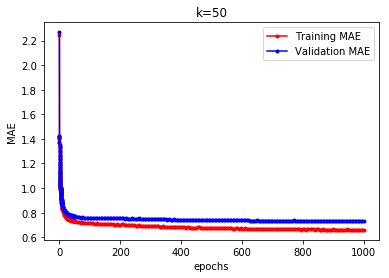

In [102]:
plt.plot(m350.trace_epoch, m350.trace_mae_train, label="Training MAE")
plt.title("k=50")
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.plot(m350.trace_epoch, m350.trace_mae_valid, label="Validation MAE")
plt.legend()

In [183]:
m3b2 = CollabFilterOneVectorPerItem(
        n_epochs=100, step_size=0.2, n_factors = 2, alpha = 0.5)
m3b2.init_parameter_dict(n_users, n_items, train_tuple)
a = m3b2.fit(train_tuple, valid_tuple)



epoch       0.000 | loss_total    11.79837 | train_MAE     2.24348 | valid_MAE     2.26721 | grad_wrt_mu     4.14408 | grad_wrt_b_per_user     0.00551 | grad_wrt_c_per_item     0.00352 | grad_wrt_U     0.00396 | grad_wrt_V     0.00255
epoch       0.013 | loss_total     9.09446 | train_MAE     1.70425 | valid_MAE     1.72397 | grad_wrt_mu     2.35420 | grad_wrt_b_per_user     0.00382 | grad_wrt_c_per_item     0.00260 | grad_wrt_U     0.00349 | grad_wrt_V     0.00232
epoch       0.025 | loss_total     8.06755 | train_MAE     1.51069 | valid_MAE     1.52328 | grad_wrt_mu     1.37216 | grad_wrt_b_per_user     0.00323 | grad_wrt_c_per_item     0.00224 | grad_wrt_U     0.00325 | grad_wrt_V     0.00214
epoch       0.100 | loss_total     7.48733 | train_MAE     1.40937 | valid_MAE     1.41268 | grad_wrt_mu     0.06299 | grad_wrt_b_per_user     0.00266 | grad_wrt_c_per_item     0.00192 | grad_wrt_U     0.00317 | grad_wrt_V     0.00208
epoch       0.200 | loss_total     7.23643 | train_MAE     1

epoch       3.900 | loss_total     5.40984 | train_MAE     1.09561 | valid_MAE     1.11053 | grad_wrt_mu     0.00035 | grad_wrt_b_per_user     0.00203 | grad_wrt_c_per_item     0.00160 | grad_wrt_U     0.00197 | grad_wrt_V     0.00137
epoch       4.000 | loss_total     5.37033 | train_MAE     1.09103 | valid_MAE     1.10593 | grad_wrt_mu     0.03958 | grad_wrt_b_per_user     0.00206 | grad_wrt_c_per_item     0.00163 | grad_wrt_U     0.00198 | grad_wrt_V     0.00145
epoch       4.100 | loss_total     5.33069 | train_MAE     1.08529 | valid_MAE     1.10060 | grad_wrt_mu     0.00273 | grad_wrt_b_per_user     0.00208 | grad_wrt_c_per_item     0.00159 | grad_wrt_U     0.00191 | grad_wrt_V     0.00137
epoch       4.200 | loss_total     5.29392 | train_MAE     1.08427 | valid_MAE     1.09849 | grad_wrt_mu     0.17553 | grad_wrt_b_per_user     0.00205 | grad_wrt_c_per_item     0.00164 | grad_wrt_U     0.00196 | grad_wrt_V     0.00141
epoch       4.313 | loss_total     5.25211 | train_MAE     1

epoch      15.000 | loss_total     3.30236 | train_MAE     0.85339 | valid_MAE     0.87440 | grad_wrt_mu     0.08114 | grad_wrt_b_per_user     0.00165 | grad_wrt_c_per_item     0.00129 | grad_wrt_U     0.00105 | grad_wrt_V     0.00082
epoch      16.000 | loss_total     3.20184 | train_MAE     0.84493 | valid_MAE     0.86613 | grad_wrt_mu     0.03408 | grad_wrt_b_per_user     0.00170 | grad_wrt_c_per_item     0.00130 | grad_wrt_U     0.00102 | grad_wrt_V     0.00082
epoch      17.000 | loss_total     3.10867 | train_MAE     0.83728 | valid_MAE     0.85868 | grad_wrt_mu     0.07130 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00100 | grad_wrt_V     0.00079
epoch      18.000 | loss_total     3.02107 | train_MAE     0.83158 | valid_MAE     0.85278 | grad_wrt_mu     0.02276 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00120 | grad_wrt_U     0.00099 | grad_wrt_V     0.00078
epoch      19.000 | loss_total     2.93829 | train_MAE     0

epoch      49.000 | loss_total     1.64747 | train_MAE     0.76690 | valid_MAE     0.78468 | grad_wrt_mu     0.01326 | grad_wrt_b_per_user     0.00133 | grad_wrt_c_per_item     0.00095 | grad_wrt_U     0.00046 | grad_wrt_V     0.00041
epoch      50.000 | loss_total     1.62602 | train_MAE     0.76677 | valid_MAE     0.78431 | grad_wrt_mu     0.03650 | grad_wrt_b_per_user     0.00139 | grad_wrt_c_per_item     0.00094 | grad_wrt_U     0.00047 | grad_wrt_V     0.00040
epoch      55.000 | loss_total     1.52674 | train_MAE     0.76302 | valid_MAE     0.78072 | grad_wrt_mu     0.13257 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00042 | grad_wrt_V     0.00036
epoch      60.000 | loss_total     1.44239 | train_MAE     0.76042 | valid_MAE     0.77817 | grad_wrt_mu     0.12877 | grad_wrt_b_per_user     0.00130 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00038 | grad_wrt_V     0.00034
epoch      65.000 | loss_total     1.37169 | train_MAE     0

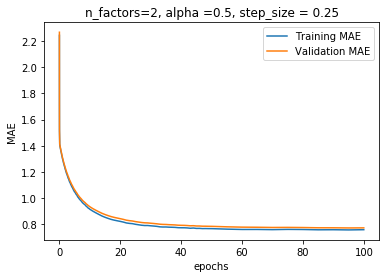

In [184]:
plt.plot(m3b2.trace_epoch, m3b2.trace_mae_train,  label="Training MAE")
plt.plot(m3b2.trace_epoch, m3b2.trace_mae_valid, label="Validation MAE")
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.title("n_factors=2, alpha =0.5, step_size = 0.25")
plt.legend()

In [188]:
m3b10 = CollabFilterOneVectorPerItem(
        n_epochs=1000, step_size=0.1, n_factors =10, alpha = 0.75)
m3b10.init_parameter_dict(n_users, n_items, train_tuple)
a = m3b10.fit(train_tuple, valid_tuple)


epoch       0.000 | loss_total    13.83245 | train_MAE     2.24348 | valid_MAE     2.26721 | grad_wrt_mu     4.14408 | grad_wrt_b_per_user     0.00599 | grad_wrt_c_per_item     0.00401 | grad_wrt_U     0.00428 | grad_wrt_V     0.00290
epoch       0.013 | loss_total    12.28603 | train_MAE     1.94564 | valid_MAE     1.96709 | grad_wrt_mu     3.18643 | grad_wrt_b_per_user     0.00500 | grad_wrt_c_per_item     0.00347 | grad_wrt_U     0.00404 | grad_wrt_V     0.00282
epoch       0.025 | loss_total    11.21496 | train_MAE     1.75395 | valid_MAE     1.77410 | grad_wrt_mu     2.50984 | grad_wrt_b_per_user     0.00449 | grad_wrt_c_per_item     0.00318 | grad_wrt_U     0.00382 | grad_wrt_V     0.00266
epoch       0.100 | loss_total     9.63897 | train_MAE     1.42188 | valid_MAE     1.42927 | grad_wrt_mu     0.58284 | grad_wrt_b_per_user     0.00314 | grad_wrt_c_per_item     0.00238 | grad_wrt_U     0.00357 | grad_wrt_V     0.00249
epoch       0.200 | loss_total     9.33185 | train_MAE     1

epoch       3.713 | loss_total     7.90392 | train_MAE     1.21070 | valid_MAE     1.22141 | grad_wrt_mu     0.01464 | grad_wrt_b_per_user     0.00249 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00262 | grad_wrt_V     0.00198
epoch       3.800 | loss_total     7.87316 | train_MAE     1.20800 | valid_MAE     1.21846 | grad_wrt_mu     0.16171 | grad_wrt_b_per_user     0.00271 | grad_wrt_c_per_item     0.00214 | grad_wrt_U     0.00287 | grad_wrt_V     0.00210
epoch       3.900 | loss_total     7.83031 | train_MAE     1.20331 | valid_MAE     1.21408 | grad_wrt_mu     0.02693 | grad_wrt_b_per_user     0.00247 | grad_wrt_c_per_item     0.00205 | grad_wrt_U     0.00264 | grad_wrt_V     0.00194
epoch       4.000 | loss_total     7.79022 | train_MAE     1.19951 | valid_MAE     1.21030 | grad_wrt_mu     0.06210 | grad_wrt_b_per_user     0.00251 | grad_wrt_c_per_item     0.00211 | grad_wrt_U     0.00268 | grad_wrt_V     0.00203
epoch       4.100 | loss_total     7.74851 | train_MAE     1

epoch      12.000 | loss_total     5.72249 | train_MAE     0.99210 | valid_MAE     1.00710 | grad_wrt_mu     0.00908 | grad_wrt_b_per_user     0.00211 | grad_wrt_c_per_item     0.00178 | grad_wrt_U     0.00182 | grad_wrt_V     0.00145
epoch      13.000 | loss_total     5.54815 | train_MAE     0.97628 | valid_MAE     0.99156 | grad_wrt_mu     0.08282 | grad_wrt_b_per_user     0.00200 | grad_wrt_c_per_item     0.00173 | grad_wrt_U     0.00174 | grad_wrt_V     0.00139
epoch      14.000 | loss_total     5.38448 | train_MAE     0.96134 | valid_MAE     0.97706 | grad_wrt_mu     0.10617 | grad_wrt_b_per_user     0.00203 | grad_wrt_c_per_item     0.00174 | grad_wrt_U     0.00168 | grad_wrt_V     0.00134
epoch      15.000 | loss_total     5.23345 | train_MAE     0.94778 | valid_MAE     0.96397 | grad_wrt_mu     0.10565 | grad_wrt_b_per_user     0.00207 | grad_wrt_c_per_item     0.00174 | grad_wrt_U     0.00165 | grad_wrt_V     0.00133
epoch      16.000 | loss_total     5.08735 | train_MAE     0

epoch      48.000 | loss_total     2.63608 | train_MAE     0.80067 | valid_MAE     0.81788 | grad_wrt_mu     0.04967 | grad_wrt_b_per_user     0.00158 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00081 | grad_wrt_V     0.00074
epoch      49.000 | loss_total     2.59365 | train_MAE     0.79855 | valid_MAE     0.81591 | grad_wrt_mu     0.00925 | grad_wrt_b_per_user     0.00160 | grad_wrt_c_per_item     0.00125 | grad_wrt_U     0.00079 | grad_wrt_V     0.00074
epoch      50.000 | loss_total     2.55340 | train_MAE     0.79810 | valid_MAE     0.81515 | grad_wrt_mu     0.05386 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00123 | grad_wrt_U     0.00080 | grad_wrt_V     0.00071
epoch      55.000 | loss_total     2.36758 | train_MAE     0.79171 | valid_MAE     0.80870 | grad_wrt_mu     0.13120 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00121 | grad_wrt_U     0.00072 | grad_wrt_V     0.00066
epoch      60.000 | loss_total     2.20458 | train_MAE     0

epoch     215.000 | loss_total     1.03182 | train_MAE     0.77051 | valid_MAE     0.78217 | grad_wrt_mu     0.00320 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00011 | grad_wrt_V     0.00010
epoch     220.000 | loss_total     1.02777 | train_MAE     0.77144 | valid_MAE     0.78269 | grad_wrt_mu     0.05983 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00010 | grad_wrt_V     0.00009
epoch     225.000 | loss_total     1.02610 | train_MAE     0.77028 | valid_MAE     0.78195 | grad_wrt_mu     0.02204 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00010 | grad_wrt_V     0.00009
epoch     230.000 | loss_total     1.02342 | train_MAE     0.77080 | valid_MAE     0.78221 | grad_wrt_mu     0.02956 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00009 | grad_wrt_V     0.00008
epoch     235.000 | loss_total     1.02079 | train_MAE     0

epoch     390.000 | loss_total     1.00287 | train_MAE     0.77073 | valid_MAE     0.78179 | grad_wrt_mu     0.06700 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch     395.000 | loss_total     1.00341 | train_MAE     0.77023 | valid_MAE     0.78150 | grad_wrt_mu     0.10840 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch     400.000 | loss_total     1.00514 | train_MAE     0.77072 | valid_MAE     0.78178 | grad_wrt_mu     0.05725 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch     405.000 | loss_total     1.00257 | train_MAE     0.76964 | valid_MAE     0.78117 | grad_wrt_mu     0.10451 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch     410.000 | loss_total     1.00292 | train_MAE     0

epoch     565.000 | loss_total     1.00290 | train_MAE     0.77137 | valid_MAE     0.78217 | grad_wrt_mu     0.03670 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     570.000 | loss_total     1.00441 | train_MAE     0.77172 | valid_MAE     0.78239 | grad_wrt_mu     0.03303 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     575.000 | loss_total     1.00367 | train_MAE     0.77030 | valid_MAE     0.78152 | grad_wrt_mu     0.04439 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     580.000 | loss_total     1.00289 | train_MAE     0.77077 | valid_MAE     0.78180 | grad_wrt_mu     0.08008 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     585.000 | loss_total     1.00219 | train_MAE     0

epoch     740.000 | loss_total     1.00405 | train_MAE     0.77089 | valid_MAE     0.78187 | grad_wrt_mu     0.01143 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     745.000 | loss_total     1.00333 | train_MAE     0.77202 | valid_MAE     0.78258 | grad_wrt_mu     0.07302 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00071 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     750.000 | loss_total     1.00353 | train_MAE     0.77137 | valid_MAE     0.78216 | grad_wrt_mu     0.00781 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     755.000 | loss_total     1.00399 | train_MAE     0.76972 | valid_MAE     0.78119 | grad_wrt_mu     0.01508 | grad_wrt_b_per_user     0.00115 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     760.000 | loss_total     1.00429 | train_MAE     0

epoch     915.000 | loss_total     1.00336 | train_MAE     0.77072 | valid_MAE     0.78176 | grad_wrt_mu     0.02082 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     920.000 | loss_total     1.00299 | train_MAE     0.77101 | valid_MAE     0.78194 | grad_wrt_mu     0.07437 | grad_wrt_b_per_user     0.00109 | grad_wrt_c_per_item     0.00070 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     925.000 | loss_total     1.00309 | train_MAE     0.77090 | valid_MAE     0.78187 | grad_wrt_mu     0.12284 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     930.000 | loss_total     1.00391 | train_MAE     0.77208 | valid_MAE     0.78262 | grad_wrt_mu     0.01107 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     935.000 | loss_total     1.00309 | train_MAE     0

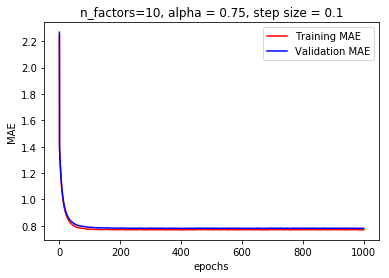

In [237]:
plt.plot(m3b10.trace_epoch, m3b10.trace_mae_train, 'r',label="Training MAE")
plt.plot(m3b10.trace_epoch, m3b10.trace_mae_valid, 'b',label="Validation MAE")
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.title("n_factors=10, alpha = 0.75, step size = 0.1")
plt.legend()

In [239]:
m3b50 = CollabFilterOneVectorPerItem(
        n_epochs=1000, step_size=0.05, n_factors =50, alpha = 1)
m3b50.init_parameter_dict(n_users, n_items, train_tuple)
m3b50.fit(train_tuple, valid_tuple)



epoch       0.000 | loss_total    15.86654 | train_MAE     2.24348 | valid_MAE     2.26721 | grad_wrt_mu     4.14408 | grad_wrt_b_per_user     0.00647 | grad_wrt_c_per_item     0.00450 | grad_wrt_U     0.00462 | grad_wrt_V     0.00327
epoch       0.013 | loss_total    15.02989 | train_MAE     2.08869 | valid_MAE     2.11112 | grad_wrt_mu     3.60265 | grad_wrt_b_per_user     0.00589 | grad_wrt_c_per_item     0.00418 | grad_wrt_U     0.00450 | grad_wrt_V     0.00327
epoch       0.025 | loss_total    14.24748 | train_MAE     1.96339 | valid_MAE     1.98499 | grad_wrt_mu     3.20416 | grad_wrt_b_per_user     0.00559 | grad_wrt_c_per_item     0.00400 | grad_wrt_U     0.00435 | grad_wrt_V     0.00314
epoch       0.100 | loss_total    12.31332 | train_MAE     1.55239 | valid_MAE     1.56728 | grad_wrt_mu     1.67460 | grad_wrt_b_per_user     0.00424 | grad_wrt_c_per_item     0.00319 | grad_wrt_U     0.00405 | grad_wrt_V     0.00295
epoch       0.200 | loss_total    11.54686 | train_MAE     1

epoch       3.900 | loss_total    10.32184 | train_MAE     1.28696 | valid_MAE     1.29503 | grad_wrt_mu     0.03826 | grad_wrt_b_per_user     0.00290 | grad_wrt_c_per_item     0.00252 | grad_wrt_U     0.00328 | grad_wrt_V     0.00249
epoch       4.000 | loss_total    10.28825 | train_MAE     1.28429 | valid_MAE     1.29238 | grad_wrt_mu     0.07033 | grad_wrt_b_per_user     0.00294 | grad_wrt_c_per_item     0.00258 | grad_wrt_U     0.00336 | grad_wrt_V     0.00260
epoch       4.100 | loss_total    10.25199 | train_MAE     1.28069 | valid_MAE     1.28910 | grad_wrt_mu     0.03649 | grad_wrt_b_per_user     0.00294 | grad_wrt_c_per_item     0.00253 | grad_wrt_U     0.00325 | grad_wrt_V     0.00249
epoch       4.200 | loss_total    10.22008 | train_MAE     1.27908 | valid_MAE     1.28712 | grad_wrt_mu     0.16112 | grad_wrt_b_per_user     0.00291 | grad_wrt_c_per_item     0.00257 | grad_wrt_U     0.00335 | grad_wrt_V     0.00256
epoch       4.313 | loss_total    10.18298 | train_MAE     1

epoch      14.000 | loss_total     7.95494 | train_MAE     1.08051 | valid_MAE     1.09359 | grad_wrt_mu     0.13754 | grad_wrt_b_per_user     0.00253 | grad_wrt_c_per_item     0.00224 | grad_wrt_U     0.00243 | grad_wrt_V     0.00195
epoch      15.000 | loss_total     7.78489 | train_MAE     1.06613 | valid_MAE     1.07964 | grad_wrt_mu     0.12290 | grad_wrt_b_per_user     0.00259 | grad_wrt_c_per_item     0.00227 | grad_wrt_U     0.00242 | grad_wrt_V     0.00194
epoch      16.000 | loss_total     7.61761 | train_MAE     1.05308 | valid_MAE     1.06685 | grad_wrt_mu     0.00350 | grad_wrt_b_per_user     0.00260 | grad_wrt_c_per_item     0.00224 | grad_wrt_U     0.00234 | grad_wrt_V     0.00193
epoch      17.000 | loss_total     7.45915 | train_MAE     1.04163 | valid_MAE     1.05526 | grad_wrt_mu     0.04779 | grad_wrt_b_per_user     0.00251 | grad_wrt_c_per_item     0.00220 | grad_wrt_U     0.00233 | grad_wrt_V     0.00188
epoch      18.000 | loss_total     7.30763 | train_MAE     1

epoch      50.000 | loss_total     4.31201 | train_MAE     0.85494 | valid_MAE     0.87128 | grad_wrt_mu     0.07043 | grad_wrt_b_per_user     0.00205 | grad_wrt_c_per_item     0.00168 | grad_wrt_U     0.00133 | grad_wrt_V     0.00119
epoch      55.000 | loss_total     4.02870 | train_MAE     0.84314 | valid_MAE     0.85970 | grad_wrt_mu     0.13547 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00167 | grad_wrt_U     0.00123 | grad_wrt_V     0.00113
epoch      60.000 | loss_total     3.77200 | train_MAE     0.83393 | valid_MAE     0.85044 | grad_wrt_mu     0.09458 | grad_wrt_b_per_user     0.00190 | grad_wrt_c_per_item     0.00163 | grad_wrt_U     0.00116 | grad_wrt_V     0.00108
epoch      65.000 | loss_total     3.54056 | train_MAE     0.82768 | valid_MAE     0.84366 | grad_wrt_mu     0.04238 | grad_wrt_b_per_user     0.00180 | grad_wrt_c_per_item     0.00154 | grad_wrt_U     0.00107 | grad_wrt_V     0.00102
epoch      70.000 | loss_total     3.33006 | train_MAE     0

epoch     225.000 | loss_total     1.21015 | train_MAE     0.78381 | valid_MAE     0.79516 | grad_wrt_mu     0.00517 | grad_wrt_b_per_user     0.00132 | grad_wrt_c_per_item     0.00086 | grad_wrt_U     0.00028 | grad_wrt_V     0.00027
epoch     230.000 | loss_total     1.19589 | train_MAE     0.78379 | valid_MAE     0.79503 | grad_wrt_mu     0.02243 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00025 | grad_wrt_V     0.00026
epoch     235.000 | loss_total     1.18245 | train_MAE     0.78369 | valid_MAE     0.79487 | grad_wrt_mu     0.05654 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00082 | grad_wrt_U     0.00025 | grad_wrt_V     0.00024
epoch     240.000 | loss_total     1.17096 | train_MAE     0.78435 | valid_MAE     0.79517 | grad_wrt_mu     0.08856 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00023 | grad_wrt_V     0.00024
epoch     245.000 | loss_total     1.16054 | train_MAE     0

epoch     400.000 | loss_total     1.03986 | train_MAE     0.78235 | valid_MAE     0.79266 | grad_wrt_mu     0.06103 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00007 | grad_wrt_V     0.00007
epoch     405.000 | loss_total     1.03641 | train_MAE     0.78169 | valid_MAE     0.79227 | grad_wrt_mu     0.09425 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00007 | grad_wrt_V     0.00006
epoch     410.000 | loss_total     1.03599 | train_MAE     0.78192 | valid_MAE     0.79239 | grad_wrt_mu     0.04428 | grad_wrt_b_per_user     0.00116 | grad_wrt_c_per_item     0.00074 | grad_wrt_U     0.00007 | grad_wrt_V     0.00006
epoch     415.000 | loss_total     1.03576 | train_MAE     0.78253 | valid_MAE     0.79273 | grad_wrt_mu     0.00735 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00006 | grad_wrt_V     0.00006
epoch     420.000 | loss_total     1.03557 | train_MAE     0

epoch     575.000 | loss_total     1.02793 | train_MAE     0.78164 | valid_MAE     0.79207 | grad_wrt_mu     0.04912 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch     580.000 | loss_total     1.02715 | train_MAE     0.78225 | valid_MAE     0.79242 | grad_wrt_mu     0.07840 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00072 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch     585.000 | loss_total     1.02634 | train_MAE     0.78290 | valid_MAE     0.79280 | grad_wrt_mu     0.07638 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch     590.000 | loss_total     1.02700 | train_MAE     0.78180 | valid_MAE     0.79215 | grad_wrt_mu     0.04001 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00002 | grad_wrt_V     0.00002
epoch     595.000 | loss_total     1.02747 | train_MAE     0

epoch     750.000 | loss_total     1.02713 | train_MAE     0.78288 | valid_MAE     0.79277 | grad_wrt_mu     0.00437 | grad_wrt_b_per_user     0.00120 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00001 | grad_wrt_V     0.00001
epoch     755.000 | loss_total     1.02760 | train_MAE     0.78169 | valid_MAE     0.79207 | grad_wrt_mu     0.00134 | grad_wrt_b_per_user     0.00118 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch     760.000 | loss_total     1.02799 | train_MAE     0.78142 | valid_MAE     0.79191 | grad_wrt_mu     0.09808 | grad_wrt_b_per_user     0.00125 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch     765.000 | loss_total     1.02643 | train_MAE     0.78197 | valid_MAE     0.79223 | grad_wrt_mu     0.02902 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch     770.000 | loss_total     1.02716 | train_MAE     0

epoch     925.000 | loss_total     1.02662 | train_MAE     0.78233 | valid_MAE     0.79244 | grad_wrt_mu     0.12190 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     930.000 | loss_total     1.02745 | train_MAE     0.78312 | valid_MAE     0.79291 | grad_wrt_mu     0.01708 | grad_wrt_b_per_user     0.00121 | grad_wrt_c_per_item     0.00076 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     935.000 | loss_total     1.02666 | train_MAE     0.78209 | valid_MAE     0.79230 | grad_wrt_mu     0.00746 | grad_wrt_b_per_user     0.00117 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     940.000 | loss_total     1.02608 | train_MAE     0.78234 | valid_MAE     0.79244 | grad_wrt_mu     0.00376 | grad_wrt_b_per_user     0.00114 | grad_wrt_c_per_item     0.00073 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     945.000 | loss_total     1.02702 | train_MAE     0

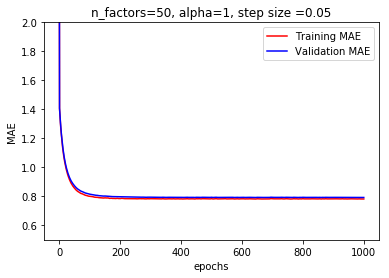

In [240]:
plt.plot(m3b50.trace_epoch, m3b50.trace_mae_train, 'r', label="Training MAE")
plt.plot(m3b50.trace_epoch, m3b50.trace_mae_valid, 'b', label="Validation MAE")
plt.xlabel("epochs")
plt.ylabel("MAE")
plt.ylim(0.5, 2)
plt.title("n_factors=50, alpha=1, step size =0.05")
plt.legend()

3C. We can reduce K to decrease the number of factors to avoid overfitting when using the same model M3 while using SGD. 

In [244]:
print("M3, K=2, regularized "+ str(min(m3b2.trace_mae_valid)))
print("M3, K=10, regularized "+ str(min(m3b10.trace_mae_valid)))
print("M3, K=50, regularized "+ str(min(m3b50.trace_mae_valid)))
print("M3, K=2 " + str(min(m32.trace_mae_valid)))
print("M3, K=10 " + str(min(m310.trace_mae_valid)))
print("M3, K=50 " + str(min(m350.trace_mae_valid)))
print("M2 "+ str(min(m2.trace_mae_valid)))
print("M1 "+ str(min(m1.trace_mae_valid)))


M3, K=2, regularized 0.7720784952451926
M3, K=10, regularized 0.7810769035947673
M3, K=50, regularized 0.7919037217149163
M3, K=2 0.7392416242473782
M3, K=10 0.732368640716035
M3, K=50 0.732368640716035
M2 0.744843941220189
M1 0.9433754963030364


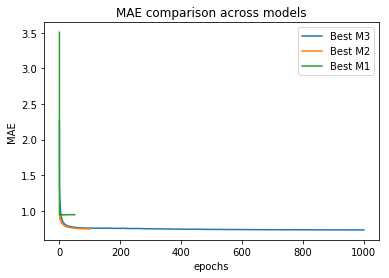

In [248]:
plt.plot(m310.trace_epoch, m310.trace_mae_valid,  label="Best M3")
plt.plot(m2.trace_epoch, m2.trace_mae_valid, label="Best M2")
plt.plot(m1.trace_epoch, m1.trace_mae_valid, label="Best M1")
plt.xlabel("epochs")
plt.ylabel("MAE")
#plt.xlim(0, 200)
plt.title("MAE comparison across models")
plt.legend()

3D. My best M3 is either k=10 and k=50, which is marginally better than M2, and much better than M1. In terms of predictive performance, the improvement between k=2 and k=10 is not much. I would recommend either k=10 because it is faster than k=50 with not much improvement.  

In [43]:
#print(ag_np.argmin(m3b2.trace_mae_valid))
m3best = CollabFilterOneVectorPerItem(
        n_epochs=100, step_size=0.25, n_factors = 2, alpha = 0.5)
m3best.init_parameter_dict(n_users, n_items, train_tuple)
m3best.fit(train_tuple, valid_tuple)


epoch       0.000 | loss_total    11.79837 | train_MAE     2.24348 | valid_MAE     2.26721 | grad_wrt_mu     4.14408 | grad_wrt_b_per_user     0.00551 | grad_wrt_c_per_item     0.00352 | grad_wrt_U     0.00396 | grad_wrt_V     0.00255
epoch       0.013 | loss_total     8.64432 | train_MAE     1.60819 | valid_MAE     1.62538 | grad_wrt_mu     1.93798 | grad_wrt_b_per_user     0.00350 | grad_wrt_c_per_item     0.00243 | grad_wrt_U     0.00340 | grad_wrt_V     0.00226
epoch       0.025 | loss_total     7.80563 | train_MAE     1.45389 | valid_MAE     1.46380 | grad_wrt_mu     0.92848 | grad_wrt_b_per_user     0.00300 | grad_wrt_c_per_item     0.00211 | grad_wrt_U     0.00320 | grad_wrt_V     0.00210
epoch       0.100 | loss_total     7.46597 | train_MAE     1.40820 | valid_MAE     1.41108 | grad_wrt_mu     0.13003 | grad_wrt_b_per_user     0.00265 | grad_wrt_c_per_item     0.00192 | grad_wrt_U     0.00316 | grad_wrt_V     0.00208
epoch       0.200 | loss_total     7.19378 | train_MAE     1

epoch       3.713 | loss_total     5.18922 | train_MAE     1.06071 | valid_MAE     1.07678 | grad_wrt_mu     0.04611 | grad_wrt_b_per_user     0.00198 | grad_wrt_c_per_item     0.00163 | grad_wrt_U     0.00180 | grad_wrt_V     0.00132
epoch       3.800 | loss_total     5.15477 | train_MAE     1.05963 | valid_MAE     1.07452 | grad_wrt_mu     0.20644 | grad_wrt_b_per_user     0.00215 | grad_wrt_c_per_item     0.00162 | grad_wrt_U     0.00199 | grad_wrt_V     0.00140
epoch       3.900 | loss_total     5.11060 | train_MAE     1.05141 | valid_MAE     1.06751 | grad_wrt_mu     0.01242 | grad_wrt_b_per_user     0.00196 | grad_wrt_c_per_item     0.00155 | grad_wrt_U     0.00182 | grad_wrt_V     0.00128
epoch       4.000 | loss_total     5.06899 | train_MAE     1.04670 | valid_MAE     1.06279 | grad_wrt_mu     0.02925 | grad_wrt_b_per_user     0.00199 | grad_wrt_c_per_item     0.00158 | grad_wrt_U     0.00183 | grad_wrt_V     0.00135
epoch       4.100 | loss_total     5.02795 | train_MAE     1

epoch      12.000 | loss_total     3.31403 | train_MAE     0.85510 | valid_MAE     0.87561 | grad_wrt_mu     0.03150 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00127 | grad_wrt_U     0.00105 | grad_wrt_V     0.00084
epoch      13.000 | loss_total     3.18947 | train_MAE     0.84478 | valid_MAE     0.86549 | grad_wrt_mu     0.06477 | grad_wrt_b_per_user     0.00151 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00099 | grad_wrt_V     0.00079
epoch      14.000 | loss_total     3.07459 | train_MAE     0.83424 | valid_MAE     0.85556 | grad_wrt_mu     0.06468 | grad_wrt_b_per_user     0.00156 | grad_wrt_c_per_item     0.00123 | grad_wrt_U     0.00096 | grad_wrt_V     0.00076
epoch      15.000 | loss_total     2.97089 | train_MAE     0.82659 | valid_MAE     0.84793 | grad_wrt_mu     0.06866 | grad_wrt_b_per_user     0.00159 | grad_wrt_c_per_item     0.00122 | grad_wrt_U     0.00092 | grad_wrt_V     0.00074
epoch      16.000 | loss_total     2.87173 | train_MAE     0

epoch      47.000 | loss_total     1.46319 | train_MAE     0.76179 | valid_MAE     0.77918 | grad_wrt_mu     0.07736 | grad_wrt_b_per_user     0.00119 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00039 | grad_wrt_V     0.00034
epoch      48.000 | loss_total     1.44446 | train_MAE     0.76255 | valid_MAE     0.77939 | grad_wrt_mu     0.03424 | grad_wrt_b_per_user     0.00127 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00039 | grad_wrt_V     0.00034
epoch      49.000 | loss_total     1.42492 | train_MAE     0.76273 | valid_MAE     0.77928 | grad_wrt_mu     0.02462 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00089 | grad_wrt_U     0.00037 | grad_wrt_V     0.00033
epoch      50.000 | loss_total     1.40754 | train_MAE     0.76276 | valid_MAE     0.77909 | grad_wrt_mu     0.02696 | grad_wrt_b_per_user     0.00134 | grad_wrt_c_per_item     0.00087 | grad_wrt_U     0.00038 | grad_wrt_V     0.00033
epoch      55.000 | loss_total     1.32799 | train_MAE     0

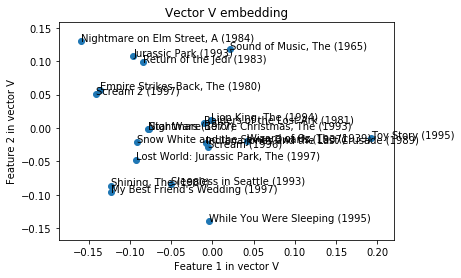

In [236]:
names = select_df["title"].tolist()
plt.scatter(m3best.param_dict["V"][select_ids][:,0], m3best.param_dict["V"][select_ids][:,1])
plt.xlabel("Feature 1 in vector V")
plt.ylabel("Feature 2 in vector V")
plt.title("Vector V embedding")
#plt.xlim(-0.001, 0.001)
#plt.ylim(-0.0003, 0.0015)
for i, txt in enumerate(names):
    plt.annotate(txt, (m3best.param_dict["V"][select_ids][:,0][i], m3best.param_dict["V"][select_ids][:,1][i]))

In [27]:
from surprise import SVD
from surprise.model_selection import cross_validate
import numpy as np
from surprise.model_selection import GridSearchCV

In [28]:
from surprise import Dataset, Reader, accuracy

reader = Reader(
    line_format='user item rating', sep=',',
    rating_scale=(1, 5), skip_lines=1)

## Load the training set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame here because that's what needed on test set)
train_df = pd.read_csv('data_movie_lens_100k/ratings_train.csv')
train_set = Dataset.load_from_df(train_df, reader=reader)
train_set = train_set.build_full_trainset()

## Load the test set into surprise's custom dataset object
## (Need to use intermediate pandas DataFrame because the true ratings are missing)
test_df = pd.read_csv('data_movie_lens_100k/ratings_test_masked.csv')
test_set = Dataset.load_from_df(test_df, reader=reader)
test_set = test_set.build_full_trainset().build_testset()

# Use the SVD algorithm
for n_factors in [1]:
    ## Fit model to training set
    model = SVD(n_factors=n_factors)
    model.fit(train_set)

    ## Measure predictions on train set
    print("Making predictions on training set (showing first 10):")
    tr_pred = model.test(train_set.build_testset())
    tr_mae = accuracy.mae(tr_pred)
    tr_predicted_ratings_N = np.asarray([p.est for p in tr_pred], dtype=np.float64)
    print(tr_predicted_ratings_N[:10])

    ## Measure predictions on test set
    print("Making predictions on test set (showing first 10):")
    te_pred = model.test(test_set)
    te_mae = accuracy.mae(te_pred) # should be NaN because no real labels on testset
    te_predicted_ratings_N = np.asarray([p.est for p in te_pred], dtype=np.float64)
    print(te_predicted_ratings_N[:10])
    
    print("n_factors %6d  tr_MAE %7.3f  test_MAE %7.3f" % (n_factors, tr_mae, te_mae))

    print("Making test set predictions in the original order")
    for row in test_df.values[:10]:
        userid = row[0]
        itemid = row[1]
        rhat = model.predict(userid, itemid)
        print("user %4d  item %4d  predicted rating % 8.3f" % (userid, itemid, rhat.est))

    print("global mean:")
    print(model.trainset.global_mean)
    print("shape of bias_per_item: ")
    print(model.bi.shape)
    print("shape of bias_per_user: ")
    print(model.bu.shape)
    print("shape of U (per user vectors): ")
    print(model.pu.shape)
    print("shape of V (per item vectors): ")
    print(model.qi.shape)

Making predictions on training set (showing first 10):
MAE:  0.7184
[2.74724363 3.65413939 2.87974797 3.64228276 2.82639757 3.49706227
 3.28145081 3.49409564 3.67145682 2.65639231]
Making predictions on test set (showing first 10):
MAE:  nan
[4.23050074 3.1789659  2.51917614 3.57696525 3.96818939 3.74515794
 3.0312313  3.70311545 3.16966437 3.59331699]
n_factors      1  tr_MAE   0.718  test_MAE     nan
Making test set predictions in the original order
user  503  item  204  predicted rating    4.231
user  795  item  185  predicted rating    4.030
user   42  item  403  predicted rating    3.607
user  327  item  740  predicted rating    3.518
user  285  item   98  predicted rating    4.001
user  279  item   11  predicted rating    4.555
user  496  item  588  predicted rating    2.354
user  499  item  266  predicted rating    3.576
user  357  item  126  predicted rating    4.074
user  932  item  182  predicted rating    3.207
global mean:
3.529480398257623
shape of bias_per_item: 
(1662,)


In [29]:
all_df = pd.read_csv(os.path.join('.', 'data_movie_lens_100k/', "ratings_train.csv"))
r = Reader(
    line_format='user item rating', sep=',',
    rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_df(all_df, r)

In [82]:
param_grid = {'n_factors': [2, 5, 10, 100],
              'reg_all': [0.005, 0.01, 0.5, 1, 5], 'lr_all': [0.01]}
#50, 0.03
#cross_validate(Msurp, data, measures=['MAE'], cv=5, verbose=True)
gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=5)

gs.fit(data)


In [83]:
gs.cv_results

{'split0_test_mae': array([0.73173314, 0.73180178, 0.76867846, 0.79895142, 0.88995555,
        0.73567636, 0.73787011, 0.76867866, 0.79895101, 0.88995553,
        0.7437492 , 0.7389067 , 0.76867616, 0.79895215, 0.88995555,
        0.77522649, 0.76721525, 0.76869569, 0.7989527 , 0.88995563]),
 'split1_test_mae': array([0.73489532, 0.74462666, 0.76880777, 0.7981643 , 0.88909896,
        0.73506189, 0.73205373, 0.76880934, 0.79816522, 0.88909897,
        0.7417005 , 0.73898294, 0.76881137, 0.79816589, 0.88909896,
        0.77704341, 0.76332893, 0.76882893, 0.79816719, 0.88909899]),
 'split2_test_mae': array([0.74120485, 0.74803529, 0.77480458, 0.804353  , 0.89453333,
        0.74307661, 0.74453656, 0.7748026 , 0.80435271, 0.89453334,
        0.74886019, 0.74292816, 0.77480863, 0.80435359, 0.89453335,
        0.78554932, 0.775005  , 0.77483579, 0.80435743, 0.89453337]),
 'split3_test_mae': array([0.73526354, 0.74617175, 0.7757866 , 0.805575  , 0.89575908,
        0.74244414, 0.74601237, 0.

In [84]:
best_n = gs.best_params["mae"]['n_factors']
best_alp = gs.best_params["mae"]['reg_all']
print(gs.best_params)
print(gs.best_score)
#0.7375

{'mae': {'n_factors': 2, 'reg_all': 0.005, 'lr_all': 0.01}}
{'mae': 0.7360735844573629}


In [85]:
fixedalph_factors = []
fixedalph_mae =[]
fixedalph_std = []
fixedfactors_alph = []
fixedfactors_mae =[]
fixedfactors_std = []
for i in range(len(gs.cv_results["mean_test_mae"])):
    if gs.cv_results["param_n_factors"][i] == 2:
        fixedfactors_alph.append(gs.cv_results["param_reg_all"][i])
        fixedfactors_mae.append(gs.cv_results["mean_test_mae"][i])
        fixedfactors_std.append(gs.cv_results["std_test_mae"][i])
    if gs.cv_results["param_reg_all"][i] == 0.01:
        fixedalph_factors.append(gs.cv_results["param_n_factors"][i])
        fixedalph_mae.append(gs.cv_results["mean_test_mae"][i])
        fixedalph_std.append(gs.cv_results["std_test_mae"][i])
        
print(fixedfactors_alph)
print(fixedalph_factors)
#gs.cv_results["params"]

[0.005, 0.01, 0.5, 1, 5]
[2, 5, 10, 100]


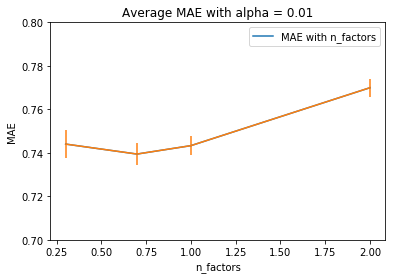

In [86]:
plt.plot(np.log10(fixedalph_factors), fixedalph_mae, label="MAE with n_factors")
plt.title("Average MAE with alpha = 0.01")
plt.xlabel("n_factors")
plt.errorbar(np.log10(fixedalph_factors), fixedalph_mae, yerr=fixedalph_std)
plt.ylabel("MAE")
plt.ylim((0.7, 0.8))
plt.legend()

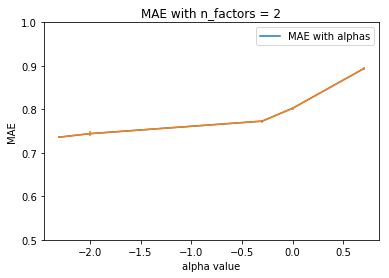

In [87]:
plt.plot(np.log10(fixedfactors_alph), fixedfactors_mae, label="MAE with alphas")
plt.title("MAE with n_factors = 2")
plt.xlabel("alpha value")
plt.ylabel("MAE")
plt.errorbar(np.log10(fixedfactors_alph), fixedfactors_mae, yerr=fixedfactors_std)
plt.ylim((0.5, 1))
plt.legend()

In [88]:
cross_validate(SVD(n_factors = 2, reg_all = 0.01, lr_all = 0.01), data, measures=['MAE'], cv=5, verbose=True)

Evaluating MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7273  0.7289  0.7417  0.7341  0.7403  0.7344  0.0058  
Fit time          1.19    1.20    1.20    1.18    1.28    1.21    0.04    
Test time         0.11    0.11    0.11    0.22    0.10    0.13    0.04    


{'test_mae': array([0.72727579, 0.72889534, 0.74165862, 0.73409792, 0.74025362]),
 'fit_time': (1.1858296394348145,
  1.2018167972564697,
  1.199758529663086,
  1.1768982410430908,
  1.2775499820709229),
 'test_time': (0.1107032299041748,
  0.10970664024353027,
  0.10671472549438477,
  0.21939778327941895,
  0.10475611686706543)}

4a. Based on a gridsearchcv, I would use the parameters K=2, alpha = 0.01. I used a learning rate of 0.01, which is slightly lower than the default. I chose this learning rate with gridsearch CV. Based on the plots of number of factors given the learning rate, and vice versa, the parameter values I have chosen are somewhat optimal. 

4b. With an average MAE of 0.7393, the surprise SVD performs better than the models in M3. This is because the alpha/regularization value is much lower, which did not punish overfitting as much. A large difference between the two models could be explained that I could not find the optimal step size for an alpha so that it does not overfit in #3. There is also a chance the SVD from surprise also overfits, but still has a lower validation MAE.  

5

In [30]:
from surprise import BaselineOnly, KNNBaseline
#'sim_options': [{'name': 'pearson_baseline'}
param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [0.01, 0.005, 0.1], 'n_epochs':[10, 20, 30, 40], 'learning_rate': [0.005, 0.01, 0.001]},
              'sim_options': {'name': ['pearson_baseline']}, 'k': [40, 50]}

neigh = GridSearchCV(KNNBaseline, param_grid, measures=['fcp', 'mae'], cv=5)
neigh.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computi

Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...

In [31]:
neigh.cv_results

{'split0_test_fcp': array([0.70710368, 0.70772568, 0.70710368, 0.70772568, 0.70710368,
        0.70772568, 0.70719698, 0.70752635, 0.70719698, 0.70752635,
        0.70719698, 0.70752635, 0.70744062, 0.70753969, 0.70744062,
        0.70753969, 0.70744062, 0.70753969, 0.70743617, 0.70753524,
        0.70743617, 0.70753524, 0.70743617, 0.70753524, 0.70710368,
        0.70772568, 0.70710368, 0.70772568, 0.70710368, 0.70772568,
        0.70719698, 0.70752635, 0.70719698, 0.70752635, 0.70719698,
        0.70752635, 0.70744062, 0.70753969, 0.70744062, 0.70753969,
        0.70744062, 0.70753969, 0.70743617, 0.70753524, 0.70743617,
        0.70753524, 0.70743617, 0.70753524, 0.70710368, 0.70772568,
        0.70710368, 0.70772568, 0.70710368, 0.70772568, 0.70719698,
        0.70752635, 0.70719698, 0.70752635, 0.70719698, 0.70752635,
        0.70744062, 0.70753969, 0.70744062, 0.70753969, 0.70744062,
        0.70753969, 0.70743617, 0.70753524, 0.70743617, 0.70753524,
        0.70743617, 0.7075352

In [32]:
print(neigh.best_params)
print(neigh.best_score)


{'fcp': {'bsl_options': {'method': 'sgd', 'reg': 0.1, 'n_epochs': 10, 'learning_rate': 0.001}, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}, 'k': 50}, 'mae': {'bsl_options': {'method': 'sgd', 'reg': 0.005, 'n_epochs': 20, 'learning_rate': 0.005}, 'sim_options': {'name': 'pearson_baseline', 'user_based': True}, 'k': 40}}
{'fcp': 0.7104621984645985, 'mae': 0.7264879827031863}


In [158]:
sim_options = {'name': 'pearson_baseline'}
#bsl_options= {'method': 'sgd', 'reg': 0.1, 'n_epochs': 10, 'learning_rate': 0.001}
bsl_options = {'method': 'sgd',
               'learning_rate': .005,
               'n_factors': 2, 'reg': 0.005
               }
with_sims = cross_validate(KNNBaseline(bsl_options=bsl_options, sim_options=sim_options), data, measures=['mae'], cv=5, verbose=True)
wo_sims = cross_validate(KNNBaseline(bsl_options=bsl_options), data, measures=['mae'], cv=5, verbose=True)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7243  0.7271  0.7215  0.7299  0.7215  0.7249  0.0033  
Fit time          1.81    2.00    1.97    1.92    2.06    1.95    0.08    
Test time         3.00    3.18    3.02    2.97    3.09    3.05    0.08    
Estimating biases using sgd...
Computing the msd similarity

In [123]:
#n_factors = 2, reg_all = 0.01, lr_all = 0.005, , sim_options=sim_options
sim_options = {'name': 'pearson_baseline'}
bsl_options = {'method': 'sgd',
               'learning_rate': .005,
               'n_factors': 2, 'reg': 0.005
               }

model = KNNBaseline(bsl_options=bsl_options, sim_options=sim_options)
model.fit(train_set)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [124]:
y_test_bae = []
for i in range(len(test_df["user_id"])):
    y_test_bae.append(model.predict(test_df["user_id"][i], test_df["item_id"][i]).est)

In [125]:
np.savetxt('predicted_ratings_test.txt', y_test_bae)
#best 0.7098
#best others 0.8634	0.8235	4.102	3.9902
#0.8634	0.8235	4.0893	3.9902
#7.096

At first, I measured my grid search cv based on fsp, but the improvement on recommendation stuff did not improve much, so I decided to judge it based on MAE

PLAN: show graph improvement with added sim_options Test mae
Show cross validation results

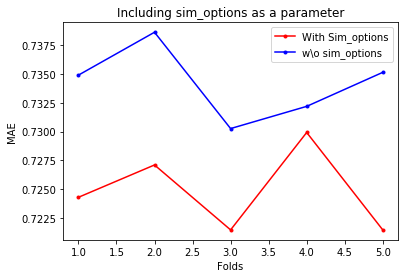

In [159]:
#sim stuff
plt.plot([1, 2, 3, 4, 5], with_sims["test_mae"], "r.-", label="With Sim_options")
plt.title("Including sim_options as a parameter")
plt.xlabel("Folds")
plt.ylabel("MAE")
plt.plot([1, 2, 3, 4, 5], wo_sims["test_mae"], "b.-", label="w\o sim_options")
plt.legend()

In [160]:
param_grid_epochs = {'bsl_options': {'method': ['sgd'],
                              'reg': [0.005], 'n_epochs':[10, 20, 30, 40, 50], 'learning_rate': [0.005]},
              'sim_options': {'name': ['pearson_baseline']}}

forEpochs = GridSearchCV(KNNBaseline, param_grid_epochs, measures=['mae'], cv=5)
forEpochs.fit(data)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

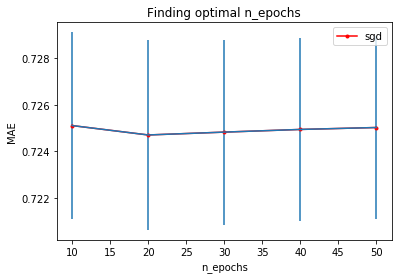

In [161]:
#Not completely sure due to standard deviations, but it does seem lower, so I decided to use it anyways
param_n_epochs = []
for i in forEpochs.cv_results['param_bsl_options']:
    param_n_epochs.append(i["n_epochs"])
plt.plot(param_n_epochs, forEpochs.cv_results["mean_test_mae"], "r.-", label="sgd")
#plt.ylim(0.725, 0.726)
plt.title("Finding optimal n_epochs")
plt.xlabel("n_epochs")
plt.errorbar(param_n_epochs, forEpochs.cv_results["mean_test_mae"], yerr=forEpochs.cv_results["std_test_mae"])
plt.ylabel("MAE")
plt.legend()

In [162]:
param_grid_reg = {'bsl_options': {'method': ['sgd'],
                              'reg': [0.005, 0.05, 0.1, 0.25, 0.5], 'learning_rate': [0.005]},
              'sim_options': {'name': ['pearson_baseline']}}

forReg = GridSearchCV(KNNBaseline, param_grid_reg, measures=['mae'], cv=5)
forReg.fit(data)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

[1 2 3 4 5]


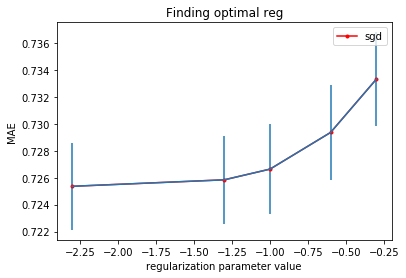

In [163]:
print(forReg.cv_results["rank_test_mae"])
param_reg = []
for i in forReg.cv_results['param_bsl_options']:
    param_reg.append(i["reg"])
plt.plot(np.log10(param_reg), forReg.cv_results["mean_test_mae"], "r.-", label="sgd")
plt.title("Finding optimal reg")
plt.xlabel("regularization parameter value")
plt.errorbar(np.log10(param_reg), forReg.cv_results["mean_test_mae"], yerr=forReg.cv_results["std_test_mae"])
plt.ylabel("MAE")
plt.legend()

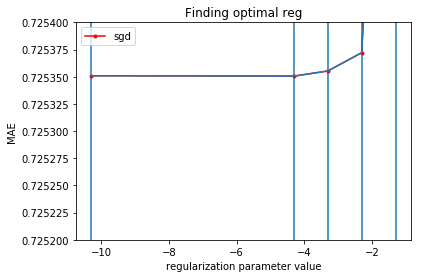

In [146]:
plt.plot(np.log10(param_reg), forReg.cv_results["mean_test_mae"], "r.-", label="sgd")
plt.title("Finding optimal reg")
plt.xlabel("regularization parameter value")
#plt.ylim(0.7252, 0.7254)
plt.errorbar(np.log10(param_reg), forReg.cv_results["mean_test_mae"], yerr=forReg.cv_results["std_test_mae"])
plt.ylabel("MAE")
plt.legend()

In [164]:
param_grid_lr = {'bsl_options': {'method': ['sgd'],
                              'reg': [0.005], 'learning_rate': [0.0005, 0.005, 0.05, 0.5, 1]},
              'sim_options': {'name': ['pearson_baseline']}}

forLr = GridSearchCV(KNNBaseline, param_grid_lr, measures=['mae'], cv=5)
forLr.fit(data)

Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the pearson_baseline si

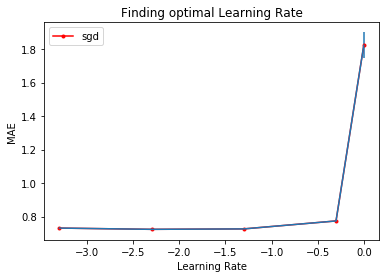

In [165]:
param_lr = []
for i in forLr.cv_results['param_bsl_options']:
    param_lr.append(i["learning_rate"])
plt.plot(np.log10(param_lr), forLr.cv_results["mean_test_mae"], "r.-", label="sgd")
plt.title("Finding optimal Learning Rate")
plt.xlabel("Learning Rate")
plt.errorbar(np.log10(param_lr), forLr.cv_results["mean_test_mae"], yerr=forLr.cv_results["std_test_mae"])
plt.ylabel("MAE")
plt.legend()

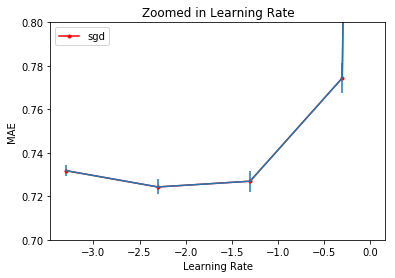

In [166]:
plt.plot(np.log10(param_lr), forLr.cv_results["mean_test_mae"], "r.-", label="sgd")
plt.title("Zoomed in Learning Rate")
plt.xlabel("Learning Rate")
plt.ylim(0.7, 0.8)
plt.errorbar(np.log10(param_lr), forLr.cv_results["mean_test_mae"], yerr=forLr.cv_results["std_test_mae"])
plt.ylabel("MAE")
plt.legend()

In [170]:
#sgd vs als
bsl_options = {'method': 'als',
               'learning_rate': .005,
               'n_factors': 2, 'reg': 0.005
               }

als = cross_validate(KNNBaseline(bsl_options=bsl_options, sim_options=sim_options), data, measures=['mae'], cv=5, verbose=True)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7211  0.7270  0.7266  0.7277  0.7308  0.7266  0.0031  
Fit time          1.65    1.67    1.78    2.01    1.92    1.81    0.14    
Test time         2.99    2.95    3.36    3.22    3.04    3.11    0.16    


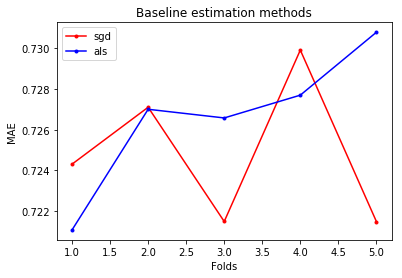

In [171]:
plt.plot([1, 2, 3, 4, 5], with_sims["test_mae"], "r.-", label="sgd")
plt.title("Baseline estimation methods")
plt.xlabel("Folds")
plt.ylabel("MAE")
plt.plot([1, 2, 3, 4, 5], als["test_mae"], "b.-", label="als")
plt.legend()

Bonus

In [224]:
model = SVD(n_factors = 2, reg_all = 0.005, lr_all = 0.01)
model.fit(train_set)
x_NF = model.pu


In [225]:
male_df = pd.read_csv(os.path.join('.', 'data_movie_lens_100k/', "user_info.csv"))
y_N = male_df["is_male"].tolist()

In [226]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
import sklearn.metrics
from sklearn import svm
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle

In [227]:
tuned_parameters = [{'n_estimators': [1, 5, 10, 50, 100],'bootstrap':[True, False], 'warm_start': [True, False], 'criterion': ["gini", "entropy"]}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='balanced_accuracy')
rfst = clf.fit(x_NF, y_N)
print(rfst.best_params_)
print(rfst.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 1, 'warm_start': False}
0.5368854949733695


In [228]:
rfst.cv_results_

C:\Users\Darren\Anaconda3\envs\comp135_env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Darren\Anaconda3\envs\comp135_env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Darren\Anaconda3\envs\comp135_env\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C

{'mean_fit_time': array([0.00239367, 0.00179687, 0.00797567, 0.00597863, 0.01136041,
        0.01215644, 0.05624871, 0.05346389, 0.1063097 , 0.10928659,
        0.00219574, 0.00220113, 0.00837836, 0.0083621 , 0.01555839,
        0.01595702, 0.07820396, 0.07438741, 0.15517464, 0.15019875,
        0.00180211, 0.00180202, 0.00758653, 0.00758014, 0.01456003,
        0.01395717, 0.06862764, 0.0761776 , 0.16196775, 0.141435  ,
        0.00260549, 0.00277839, 0.01296344, 0.01236825, 0.02451892,
        0.02571912, 0.14202089, 0.11868682, 0.29779725, 0.28963881]),
 'std_fit_time': array([0.00048827, 0.00040168, 0.0017889 , 0.00064096, 0.00049363,
        0.00040467, 0.00541027, 0.00079334, 0.00185828, 0.00359161,
        0.00038152, 0.00041162, 0.0008082 , 0.00047263, 0.00048854,
        0.0010921 , 0.00183681, 0.00135043, 0.00622356, 0.00241284,
        0.00038619, 0.00038662, 0.0004674 , 0.00101828, 0.00077971,
        0.00062945, 0.0025463 , 0.00481873, 0.02084623, 0.00576601,
        0.000

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
0.5209684623147531


In [230]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh):
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df

In [231]:
n = len(y_N)
trSize = int(n*0.5)
x_train_mix, y_train_mix = shuffle(x_NF, y_N, random_state=42)
x_tr_df = x_train_mix[:trSize]
y_tr_df = y_train_mix[:trSize]
x_va_df = x_train_mix[trSize:]
y_va_df = y_train_mix[trSize:]

Confusion Matrix for Random Forest


Predicted,0,1
True,,
0,42,105
1,83,242


In [233]:
bclss = RandomForestClassifier(bootstrap = True, criterion="gini", n_estimators=10, warm_start =True)
#bclss = rfst.best_estimator_
bclss.fit(x_tr_df, y_tr_df)
proba_M = bclss.predict_proba(x_va_df)[:,1]
print("Confusion Matrix for Random Forest")
calc_confusion_matrix_for_threshold(y_va_df, proba_M, 0.5)

Confusion Matrix for Random Forest


Predicted,0,1
True,,
0,20,127
1,37,288


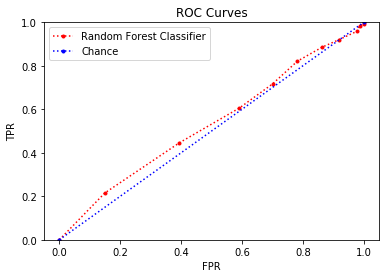

In [249]:
plt.ylim([0, 1]);
plt.xlabel("FPR");
plt.ylabel("TPR");
chance_N = np.full(proba_M.shape, 0.5)
fprlr, tprlr, thrlr = sklearn.metrics.roc_curve(y_va_df, proba_M)
fprc, tprc, thrc = sklearn.metrics.roc_curve(y_va_df, chance_N)

plt.plot(fprlr, tprlr, 'r.:', label = "Random Forest Classifier")
plt.plot(fprc, tprc, 'b.:', label = "Chance")
plt.title("ROC Curves")
plt.legend()

A. The problem is essentially, given an estimated user preferences (through the U vector), what is the gender of the user? I chose the Random Forest Classifier for this problem because I imagined that similar user vectors would be grouped together, and not really have a sort of linear decision boundary. I would think that it would be in classifiable regions. I tuned hyperparameters using a GridSearch CV. I tuned n_estimators, bootstrap, warm_start and criterion, and found that 10 bootstrapped trees without warm start measuring with a gini criterion was better. In my gridsearch CV, I looked for the results with the highest balanced accuracy because the data was not evenly distributed. When using gridsearch CV, I tested it with the entire data set and used cross validation with 5 folds. 

B. I split the training set in half. I trained my classifier on half the data and used the confusion matrix on the other half of the data. My accuracy was 0.65, so my error rate was 35%. Predicting on chance would be having a 50% error rate, so I would think a 15% improvement from that is somewhat significant. Interestingly enough, when I was scoring my gridseach CV, many test scores ended to be around 50%, and the classifier actually performs better on the test set. Given the fact that U vectors may not even be completely accurate because they are estimations, this classifier can potentially perform better on more accurate input data. 